In [1]:
"""
Here is my implementation of the reference project's approach in Python
Update: 
1) wave.read reads in data as an in16, so it needs to be unpacked to work properly
2) I forgot to take the absolute value when removing silence
3) In order to mimic Matlab directly, I needed to add the norm to dct and idct
"""
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
from scipy.fftpack import dct, idct
from numpy import empty_like

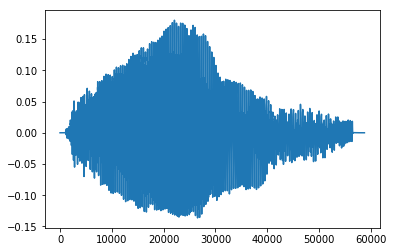

In [2]:
# Read file
Fs, y = read('cello_A2_1_forte_arco-normal.wav')
# Update 1
if y.dtype == np.int16:
    y = y.astype(np.float32) / np.iinfo(np.int16).max
plt.plot(y)
plt.show()

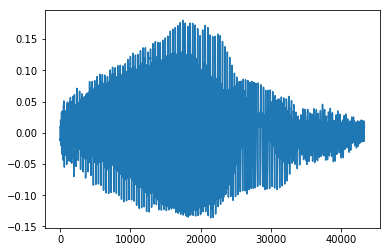

In [3]:
# Normalize sampled data (remove abs( sample ) <= 0.009)
# find indexes of silence
s_index = []
for i in range(0, len(y)):
    # Update 2
    if np.fabs(y[i]) <= 0.009:
        s_index.append(i)
# remove all index of y that is in s_index
y = np.delete(y, s_index)
plt.plot(y)
plt.show()

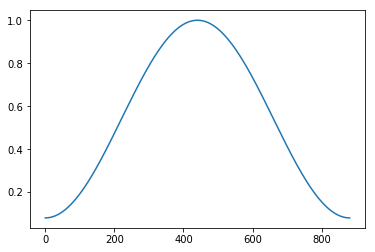

In [4]:
# Compute the N-point symmetric Hamming window filter (win_size = 882)
a = len(y);
p = 882;
num_frames = math.floor(a/p);
w = np.hamming(p);
plt.plot(w)
plt.show()

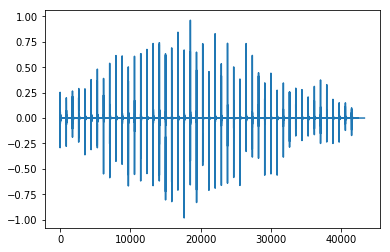

In [5]:
# Apply the Hamming Filter to the normalized sample data (element wise multiplication)
y_new = y
fourier = empty_like(y)
for i in range(1, num_frames):
    t = range( ((i-1)*p), (i*p) )
    filt = np.multiply(y_new[t], w)
    # Calculate the Discrete Cosine Transform of the
    # interval of the filtered data that was normalized
    fourier[t] = dct(filt, norm='ortho') # Update 3
plt.plot(fourier)
plt.show()

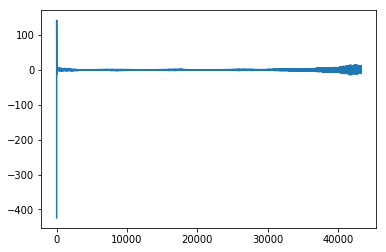

In [6]:
# Calculate the inverse discrete cosine transform of the transformed data
inv_transform = idct(np.log(abs(fourier)+0.1), norm='ortho') # Update 3
plt.plot(inv_transform)
plt.show()

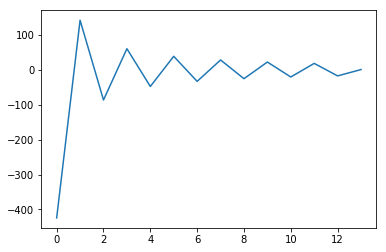

In [7]:
# Label = 1 (cello)
i = 1
#isolate the first 13 MFCC values and the label
xx = np.append(inv_transform[0:13], i)
plt.plot(xx)
plt.show()